In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from matplotlib import cm
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS



videos_df = pd.read_csv('./ydtst.csv', index_col='video_id')
videos_df.head()    # outputs f rows of data

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
video_id,,,,,,,,,,,,
nDDfFws3BfA,17.19.12,"10,000 YEARS INTO THE FUTURE IN 10 MINUTES",#Mind Warehouse,27,Top 10 10 Most #Mind Warehouse mind warehouse ...,1246572,16716,1884,5339,False,False,JELLY GUMMY BEAR ► https://goo.gl/TmjSDa\n\nWe...
nDDfFws3BfA,17.20.12,"10,000 YEARS INTO THE FUTURE IN 10 MINUTES",#Mind Warehouse,27,Top 10 10 Most #Mind Warehouse mind warehouse ...,1649569,20713,2375,6354,False,False,JELLY GUMMY BEAR ► https://goo.gl/TmjSDa\n\nWe...
7V6Z1uh3sqg,17.16.11,The startup | 1 Kg Biriyani | TVF Machi,1 Kg Biriyani,23,"1 Kg Biriyani|""1 Kilo Biriyani""|""Tamil Funny V...",43202,2755,184,165,False,False,TVF Machi : https://www.youtube.com/channel/UC...
7V6Z1uh3sqg,17.17.11,The startup | 1 Kg Biriyani | TVF Machi,1 Kg Biriyani,23,"1 Kg Biriyani|""1 Kilo Biriyani""|""Tamil Funny V...",65537,3518,236,200,False,False,TVF Machi : https://www.youtube.com/channel/UC...
pA0MdlTcBH0,17.10.12,INDIA vs HINDIA | 1 Kg Biriyani,1 Kg Biriyani,23,"1 Kg Biriyani|""1 Kilo Biriyani""|""Tamil Funny V...",55961,4285,432,341,False,False,1 Kg Briyani is a Tamil Entertainment Channel ...


In [31]:
videos_df.shape

(32499, 12)

In [32]:
videos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32499 entries, nDDfFws3BfA to 1A8RmZWuf8c
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   trending_date      32499 non-null  object
 1   title              32499 non-null  object
 2   channel_title      32499 non-null  object
 3   category_id        32499 non-null  int64 
 4   tags               32499 non-null  object
 5   views              32499 non-null  int64 
 6   likes              32499 non-null  int64 
 7   dislikes           32499 non-null  int64 
 8   comment_count      32499 non-null  int64 
 9   comments_disabled  32499 non-null  bool  
 10  ratings_disabled   32499 non-null  bool  
 11  description        31983 non-null  object
dtypes: bool(2), int64(5), object(5)
memory usage: 2.8+ MB


In [33]:
videos_df.describe()

,category_id,views,likes,dislikes,comment_count
count,32499.000000,3.249900e+04,3.249900e+04,32499.000000,32499.000000
mean,21.564387,1.037450e+06,2.791356e+04,1511.579926,2692.979138
std,6.342915,3.011706e+06,9.569039e+04,5269.151723,12340.232792
min,1.000000,4.287000e+03,0.000000e+00,0.000000,0.000000
25%,23.000000,1.215920e+05,8.880000e+02,113.000000,87.000000
50%,24.000000,2.997610e+05,3.211000e+03,340.000000,347.000000
75%,24.000000,7.987440e+05,1.468850e+04,1052.500000,1353.000000
max,43.000000,8.993071e+07,2.606663e+06,182589.000000,382685.000000


In [34]:
df = videos_df.reset_index()
df.loc[df['views'].idxmax()]

video_id                                                   6ZfuNTqbHE8
trending_date                                                 17.07.12
title                Marvel Studios' Avengers: Infinity War Officia...
channel_title                                     Marvel Entertainment
category_id                                                         24
tags                 marvel|"comics"|"comic books"|"nerdy"|"geeky"|...
views                                                         89930713
likes                                                          2606663
dislikes                                                         53011
comment_count                                                   347982
comments_disabled                                                False
ratings_disabled                                                 False
description          There was an idea… Avengers: Infinity War. In ...
Name: 16776, dtype: object

In [35]:
del_cols = ['tags', 'description']
videos_df = videos_df.drop(del_cols, axis=1)
videos_df.head()    # outputs f rows of data

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
video_id,,,,,,,,,,
nDDfFws3BfA,17.19.12,"10,000 YEARS INTO THE FUTURE IN 10 MINUTES",#Mind Warehouse,27,1246572,16716,1884,5339,False,False
nDDfFws3BfA,17.20.12,"10,000 YEARS INTO THE FUTURE IN 10 MINUTES",#Mind Warehouse,27,1649569,20713,2375,6354,False,False
7V6Z1uh3sqg,17.16.11,The startup | 1 Kg Biriyani | TVF Machi,1 Kg Biriyani,23,43202,2755,184,165,False,False
7V6Z1uh3sqg,17.17.11,The startup | 1 Kg Biriyani | TVF Machi,1 Kg Biriyani,23,65537,3518,236,200,False,False
pA0MdlTcBH0,17.10.12,INDIA vs HINDIA | 1 Kg Biriyani,1 Kg Biriyani,23,55961,4285,432,341,False,False


In [37]:
videos_df = videos_df.drop_duplicates(keep = 'first')
videos_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 28876 entries, nDDfFws3BfA to 1A8RmZWuf8c
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   trending_date      28876 non-null  object
 1   title              28876 non-null  object
 2   channel_title      28876 non-null  object
 3   category_id        28876 non-null  int64 
 4   views              28876 non-null  int64 
 5   likes              28876 non-null  int64 
 6   dislikes           28876 non-null  int64 
 7   comment_count      28876 non-null  int64 
 8   comments_disabled  28876 non-null  bool  
 9   ratings_disabled   28876 non-null  bool  
dtypes: bool(2), int64(5), object(3)
memory usage: 2.0+ MB


In [ ]:
videos_df = videos_df.drop_duplicates(keep = 'first”)

In [38]:
#3.1
videos_df.nlargest(10, 'views')

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
video_id,,,,,,,,,,
6ZfuNTqbHE8,17.07.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,89930713,2606663,53011,347982,False,False
6ZfuNTqbHE8,17.06.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,87449453,2584674,52176,341571,False,False
6ZfuNTqbHE8,17.05.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,84281319,2555411,51008,339708,False,False
6ZfuNTqbHE8,17.04.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,80360459,2513102,49170,335920,False,False
6ZfuNTqbHE8,17.03.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,74789251,2444956,46172,330710,False,False
6ZfuNTqbHE8,17.02.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,66637636,2331352,41154,316185,False,False
6ZfuNTqbHE8,17.01.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,56367282,2157733,34077,303178,False,False
u9Mv98Gr5pY,18.01.05,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,53822757,1250535,44796,135405,False,False
u9Mv98Gr5pY,18.30.04,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,53071887,1243477,44414,134673,False,False


In [ ]:
#3.2


In [44]:
#3.3
videos_df.channel_title.mode()[0]

'ETV Plus India'

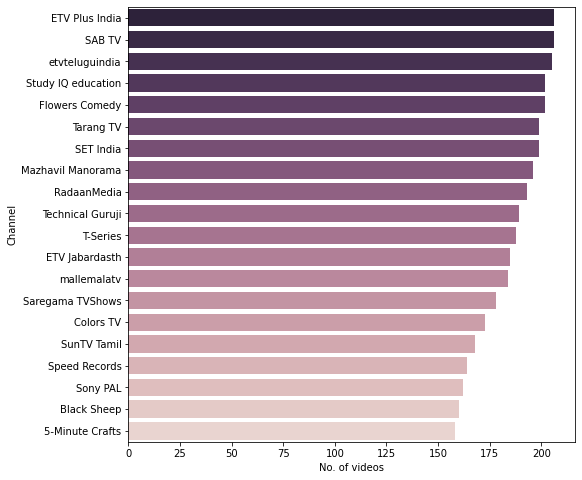

In [45]:
#3.3
cdf = videos_df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [48]:
#3.4
len(videos_df[(videos_df["comments_disabled"] == True) & (videos_df["ratings_disabled"] == True)].index)

297

In [105]:
#3.5
categories_df = pd.read_csv('./Categories.csv', index_col=0, squeeze=True).to_dict()
categories_df
videos_df['category_name'] = videos_df['category_id'].map(categories_df)
cdf = videos_df.groupby('category_name').agg({'views':'sum', 'comment_count':'sum'})
cdf.nlargest(5, 'views')

,views,comment_count
category_name,,
Entertainment,11339862784,29143531
Music,6661688191,12098627
Film & Animation,2649645388,3698978
Comedy,2386312331,11412808
News & Politics,1479157031,2268293


In [127]:
#4.1.1
videos_df.groupby('channel_title').agg({'likes':'sum'}).sort_values(by='likes', ascending=False).head(1)

,likes
channel_title,
Amit Bhadana,52376821


In [124]:
#4.2.2
videos_df.groupby('channel_title').agg({'views':'sum'}).sort_values(by='views', ascending=False).head(1)

,views
channel_title,
T-Series,1748057724
